In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams,cm,colors
import matplotlib.font_manager
import numpy as np

In [2]:
#set plotting parameters
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['font.sans-serif'] = "Helvetica"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 22})

In [3]:
plt.rcParams["font.sans-serif"]

['Helvetica']

In [4]:
## read in normalised data
adata = sc.read("../../output/adata_anno.h5ad")

/opt/conda/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/opt/conda/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


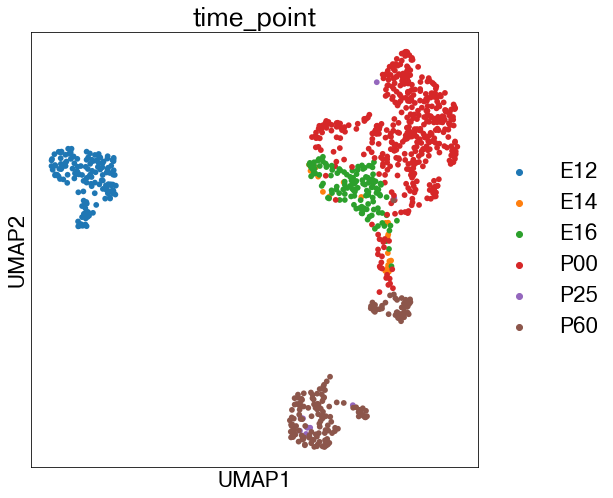

In [8]:
sc.pl.umap(adata, color = ["time_point"], save = "time_point.png")

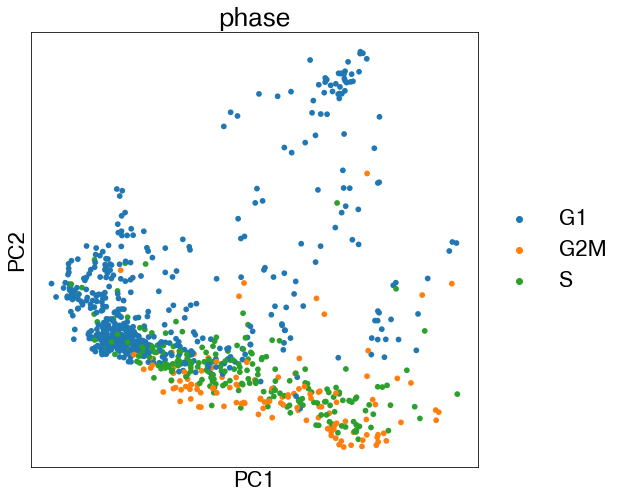

In [14]:
sc.pl.pca(adata, color = ["phase"])

In [20]:
plt.rcParams.update({'font.size': 40})

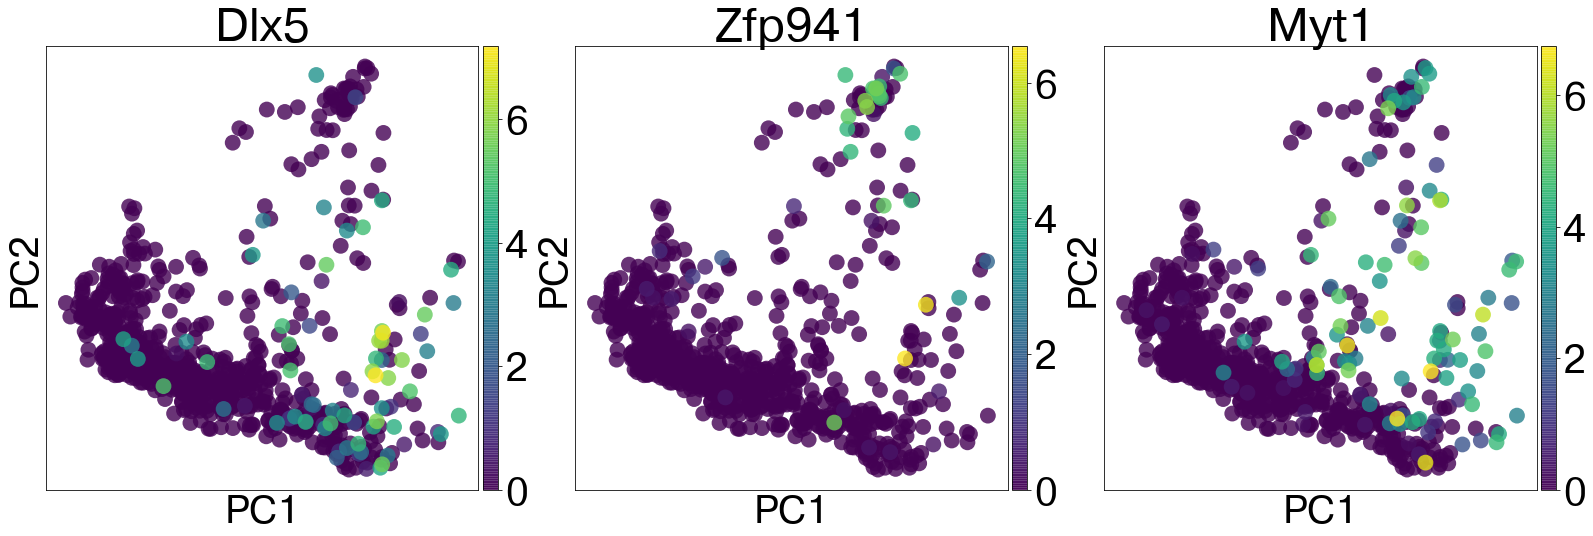

In [24]:
sc.pl.pca(adata, color=['Dlx5',"Zfp941","Myt1"],size =1000,alpha = 0.8,frameon = True, save = "neurogenic_tfs")

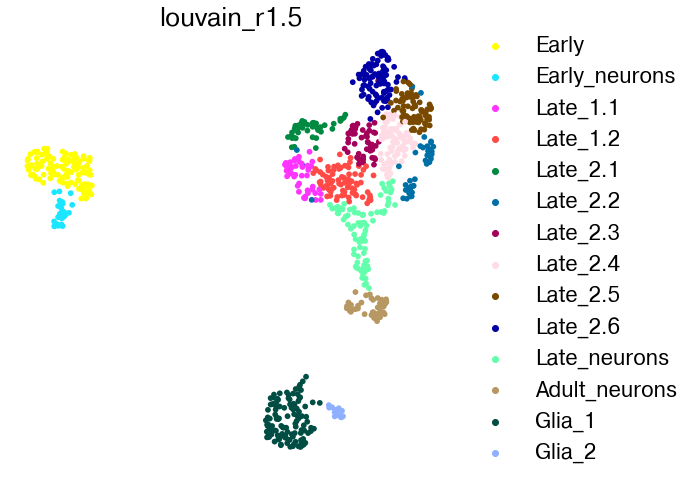

In [5]:
sc.pl.umap(adata, frameon = False, color = "louvain_r1.5")

In [22]:
adata.uns['louvain_semisup_colors']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f']

In [6]:
#merge all late 1 clusters and merge all late 2 clusters and merge adult glial clusterse
adata.obs["louvain_semisup"] = list(adata.obs["louvain_r1.5"])
adata.obs["louvain_semisup"][adata.obs["louvain_semisup"].isin(['Late_2.1','Late_2.2','Late_2.3','Late_2.4','Late_2.5','Late_2.6'])] = "Late_2"
adata.obs["louvain_semisup"][adata.obs["louvain_semisup"].isin(['Late_1.1','Late_1.2'])] = "Late_1"
#adata.obs["louvain_semisup"][adata.obs["louvain_semisup"].isin(['Glia_1','Glia_2'])] = "Glia"

/tmp/ipykernel_68/1564186706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["louvain_semisup"][adata.obs["louvain_semisup"].isin(['Late_2.1','Late_2.2','Late_2.3','Late_2.4','Late_2.5','Late_2.6'])] = "Late_2"
/tmp/ipykernel_68/1564186706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["louvain_semisup"][adata.obs["louvain_semisup"].isin(['Late_1.1','Late_1.2'])] = "Late_1"


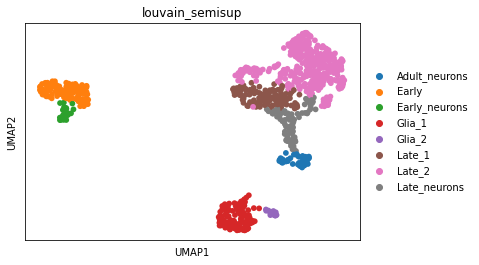

In [21]:
sc.pl.umap(adata, color = "louvain_semisup")

In [7]:
adata.obs['louvain_semisup'] = pd.Categorical(adata.obs['louvain_semisup'], 
                     categories=["Early", "Early_neurons", "Late_1", "Late_2", "Late_neurons","Adult_neurons","Glia_1", "Glia_2"],
                    ordered=True)
new_cluster_names = ["eEP", "eENP", "lEP1", "lEP2", "lENP","EN","EGC1", "EGC2"]
adata.rename_categories('louvain_semisup', new_cluster_names)

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


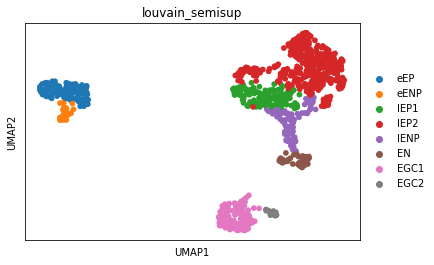

In [8]:
sc.pl.umap(adata, color = "louvain_semisup")

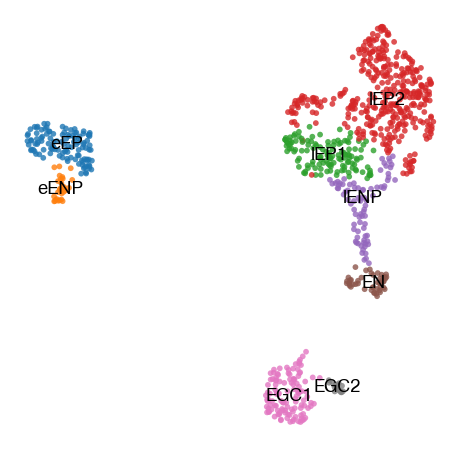

In [7]:
sc.pl.umap(adata, frameon = False, color = "louvain_semisup",legend_loc='on data',legend_fontsize = 'small',alpha = 0.8, title = "",legend_fontweight = "bold", save = "clusters_semisup.pdf")

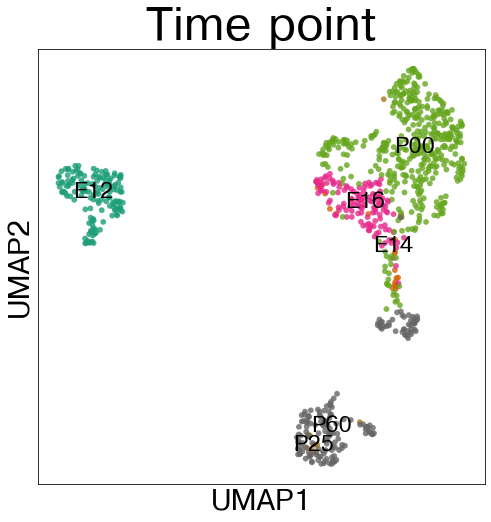

In [24]:
sc.pl.umap(adata, frameon = True, color = "time_point",legend_fontsize = 'xx-small',alpha = 0.8, title = "Time point",legend_fontweight = "bold",legend_loc='on data',palette = "Dark2", save = "time_point_dark2_framed")

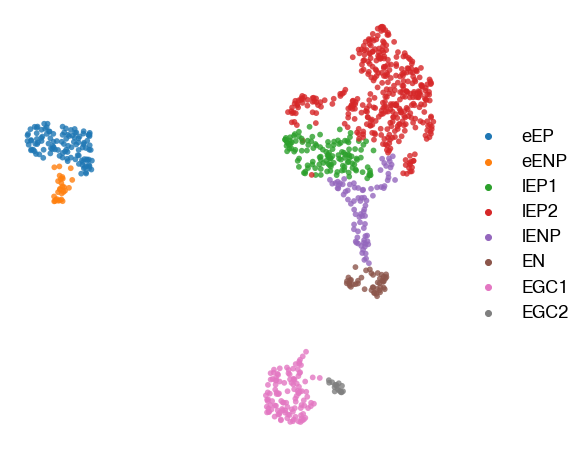

In [8]:
sc.pl.umap(adata, frameon = False, color = "louvain_semisup",legend_fontsize = 'small',alpha = 0.8, title = "",legend_fontweight = "bold", save = "clusters_semisup_legend.png")

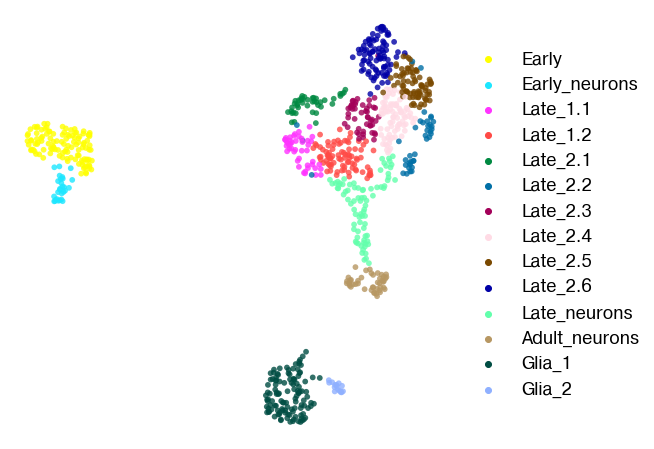

In [18]:
sc.pl.umap(adata, frameon = False, color = "louvain_r1.5",legend_fontsize = 'small',alpha = 0.8, title = "",legend_fontweight = "bold", save = "clusters_res1.5.pdf")

In [62]:
adata.obs['louvain_r1.5'] = pd.Categorical(adata.obs['louvain_r1.5'], 
                     categories=["Early", "Early_neurons", "Late_1.1", "Late_1.2","Late_2.1","Late_2.2","Late_2.3","Late_2.4","Late_2.5","Late_2.6","Late_neurons","Adult_neurons","Glia_1", "Glia_2"],
                    ordered=True)
new_cluster_names = ["1. eEP", "2. eENP", "3. lEP1.1", "4. lEP1.2","5. lEP2.1","6. lEP2.2","7. lEP2.3","8. lEP2.4","9. lEP2.5","10. lEP2.6","11. lENP","12. EN","13. EGC1", "14. EGC2"]
adata.rename_categories('louvain_r1.5', new_cluster_names)

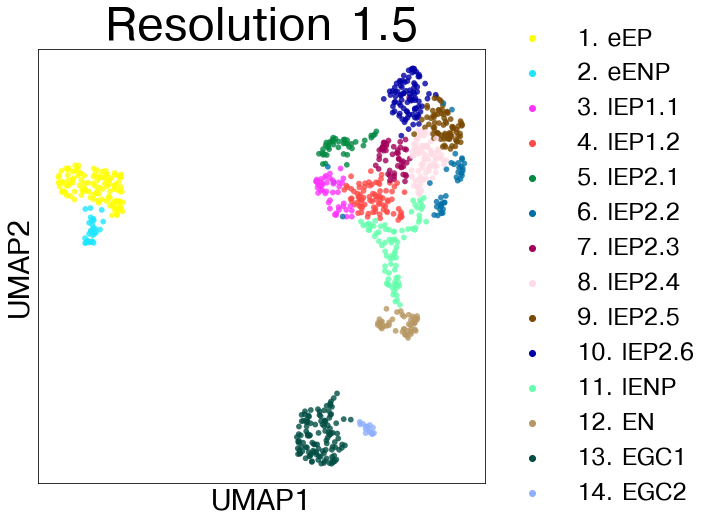

In [63]:
sc.pl.umap(adata, frameon = True, color = "louvain_r1.5",alpha = 0.8, title = "Resolution 1.5",legend_fontweight = "bold",legend_fontsize = 25, save = "louvain_r1_5.png")

In [69]:
adata.obs['louvain_semisup'] = pd.Categorical(adata.obs['louvain_semisup'], 
                     categories=["eEP","eENP","lEP1","lEP2", "lENP","EN","EGC1","EGC2"],
                    ordered=True)
new_cluster_names = ["1. eEP","2. eENP","3. lEP1","4. lEP2", "5. lENP","6. EN","7. EGC1","8. EGC2"]
adata.rename_categories('louvain_semisup', new_cluster_names)

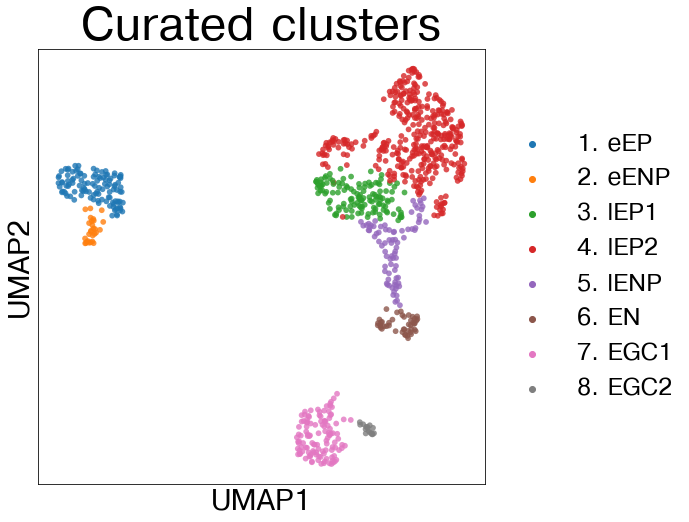

In [70]:
sc.pl.umap(adata, frameon = True, color = "louvain_semisup",alpha = 0.8, title = "Curated clusters",legend_fontweight = "bold",legend_fontsize = 25, save = "curated_clusters.png")

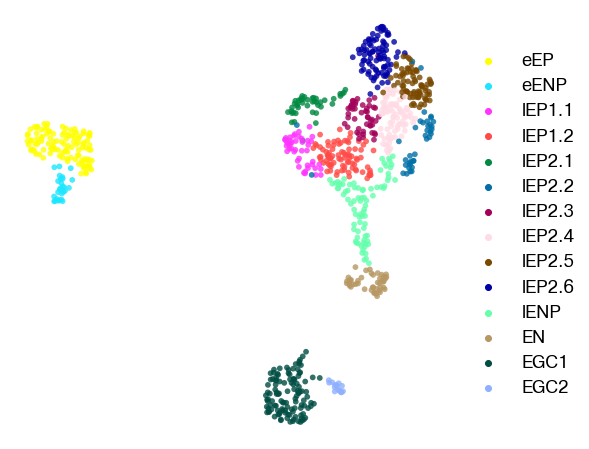

In [10]:
sc.pl.umap(adata, frameon = False, color = "louvain_r1.5",legend_fontsize = 'small',alpha = 0.8, title = "",legend_fontweight = "bold", save = "clusters_res1.5.png")

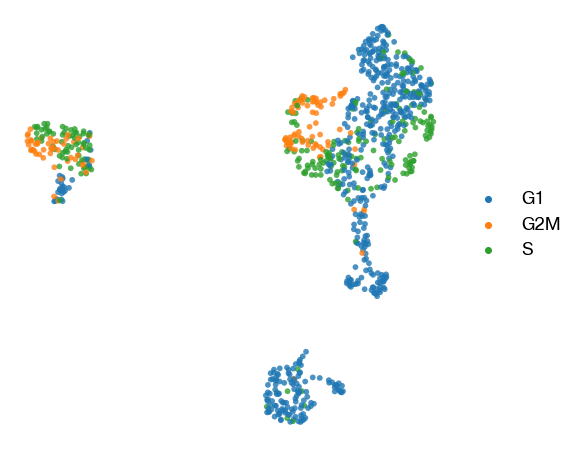

In [43]:
sc.pl.umap(adata, frameon = False, color = "phase",legend_fontsize = 'small',alpha = 0.8, title = "",legend_fontweight = "bold", save = "phase.png")

In [6]:
adata.obs["batch_E12"] = [name[-2:] for name in adata.obs["batch_E12"]]

In [7]:
adata.obs["batch_E16"] = [name[-2:] for name in adata.obs["batch_E16"]]
adata.obs["batch_P00"] = [name[-2:] for name in adata.obs["batch_P00"]]
adata.obs["batch_P60"] = [name[-2:] for name in adata.obs["batch_P60"]]

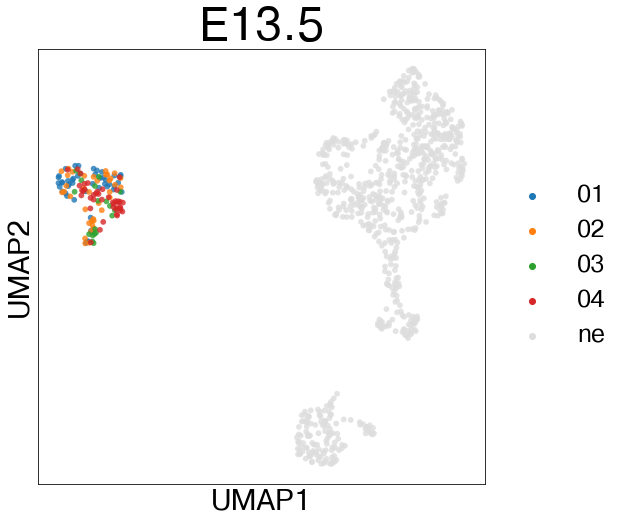

In [16]:
sc.pl.umap(adata, frameon = True, color = "batch_E12",alpha = 0.8, title = "E13.5",legend_fontweight = "bold",legend_fontsize = 25, save = "plate_E12.png")

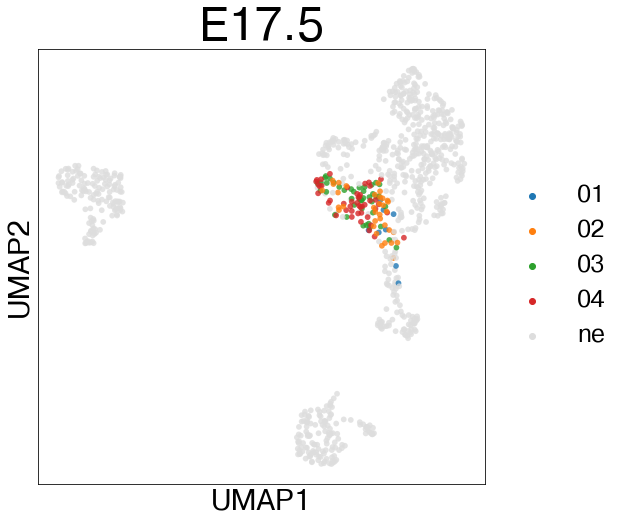

In [17]:
sc.pl.umap(adata, frameon = True, color = "batch_E16",alpha = 0.8, title = "E17.5",legend_fontweight = "bold",legend_fontsize = 25, save = "plate_E16.png")

In [ ]:
sc.pl.umap(adata, frameon = True, color = "louvain_r1.5",alpha = 0.8, title = "Resolution 1.5",legend_fontweight = "bold",legend_fontsize = 25, save = "louvain_15.pdf")

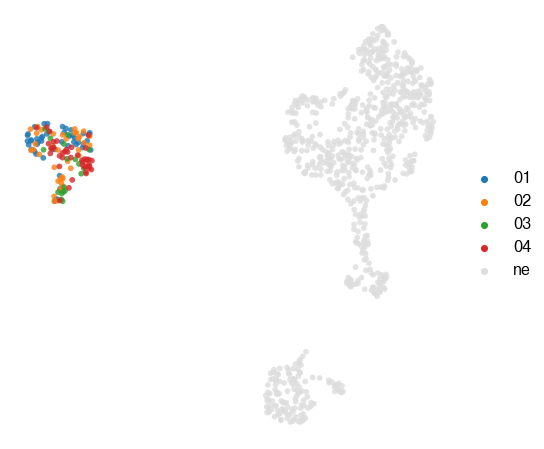

In [32]:
sc.pl.umap(adata, frameon = False, color = "batch_E12",legend_fontsize = 16,alpha = 0.8, title = "",legend_fontweight = "bold", save = "plate_E12")

... storing 'batch_E16' as categorical
... storing 'batch_P00' as categorical
... storing 'batch_P60' as categorical


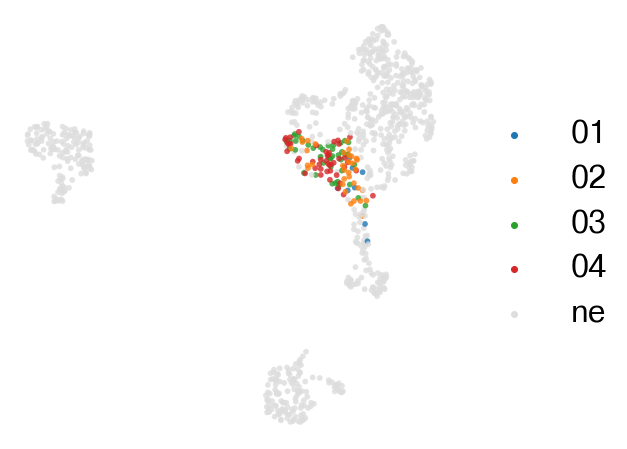

In [49]:
sc.pl.umap(adata, frameon = False, color = "batch_E16",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold", save = "plate_E16")

In [64]:
colours = sc.pl.palettes.default_64[0:16] + ["#dddddd"]

In [11]:
batch = {"01":"01","02":"02","04":"03","06":"04","07":"05","09":"06","10":"07",\
        "11":"08","14":"09","15":"10","16":"11","17":"12","ne":"ne"}

In [12]:
adata.obs.batch_P00 = [batch[name] for name in adata.obs.batch_P00]

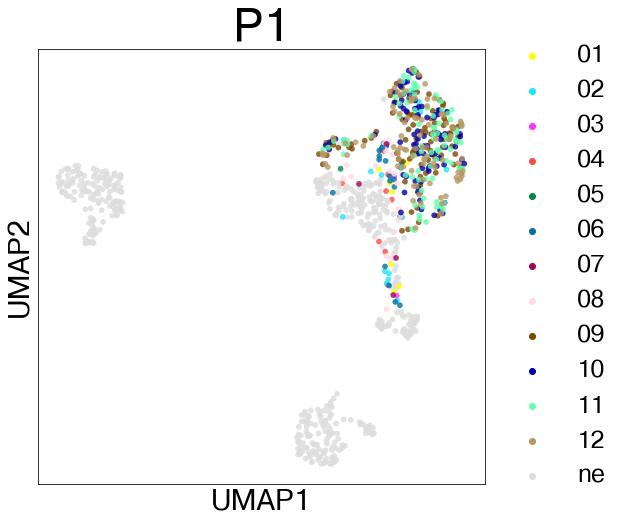

In [18]:
sc.pl.umap(adata, frameon = True, color = "batch_P00",alpha = 0.8, title = "P1",legend_fontweight = "bold",legend_fontsize = 25, palette = sc.pl.palettes.default_64[0:12] + ["#dddddd"], save = "plate_P0.png")

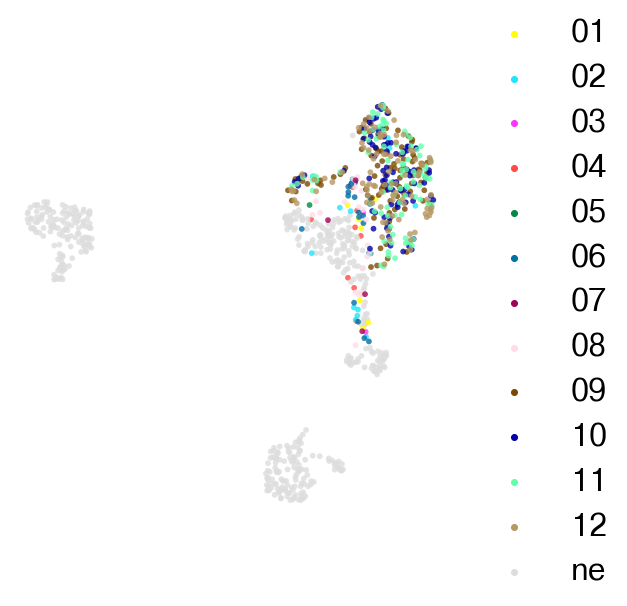

In [23]:
sc.pl.umap(adata, frameon = False, color = "batch_P00",palette = sc.pl.palettes.default_64[0:12] + ["#dddddd"], legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold", save = "plate_P00")

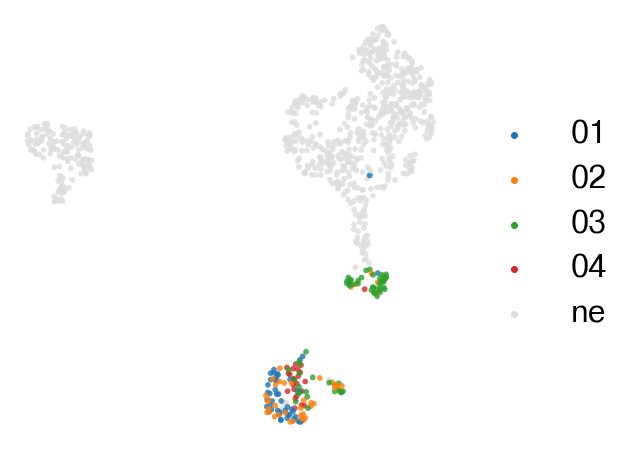

In [24]:
sc.pl.umap(adata, frameon = False, color = "batch_P60",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold", save = "plate_P60")

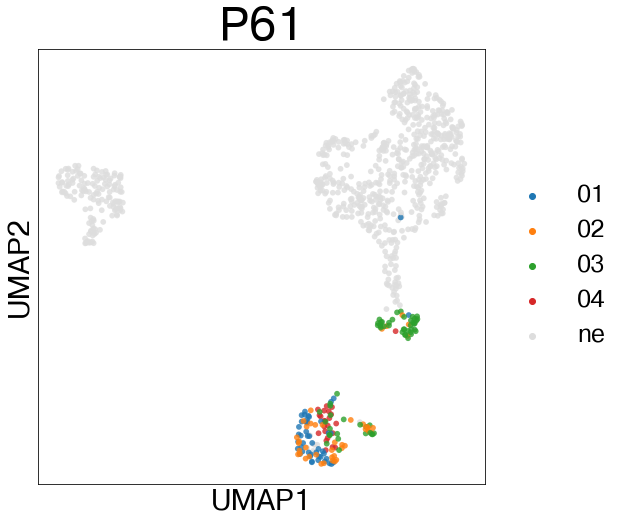

In [19]:
sc.pl.umap(adata, frameon = True, color = "batch_P60",alpha = 0.8, title = "P61",legend_fontweight = "bold",legend_fontsize =25, save = "plate_P60.png")

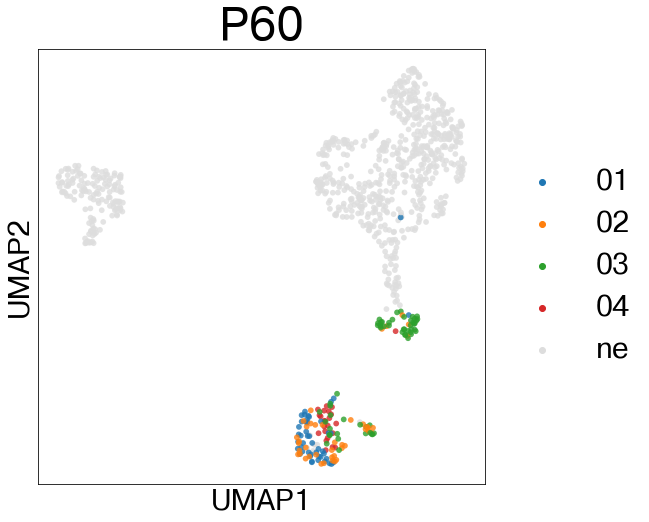

In [49]:
sc.pl.umap(adata, frameon = True, color = "batch_P60",alpha = 0.8, title = "P60",legend_fontweight = "bold",legend_fontsize = 30, save = "plate_P60.png")

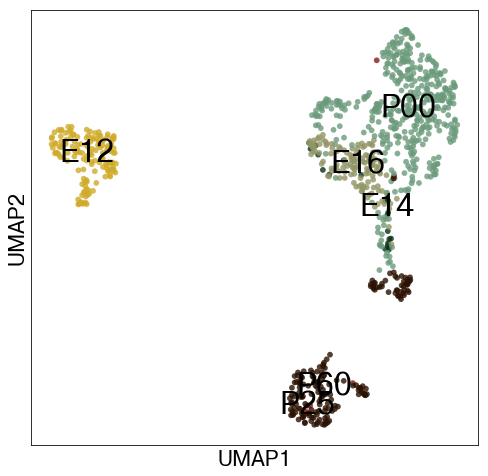

In [14]:
sc.pl.umap(adata, frameon = True, color = "time_point",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold",legend_loc='on data',palette = ["#d0aa28","#053218","#929565","#6b9a7b","#861a13","#2b1100"], save = "time_point")

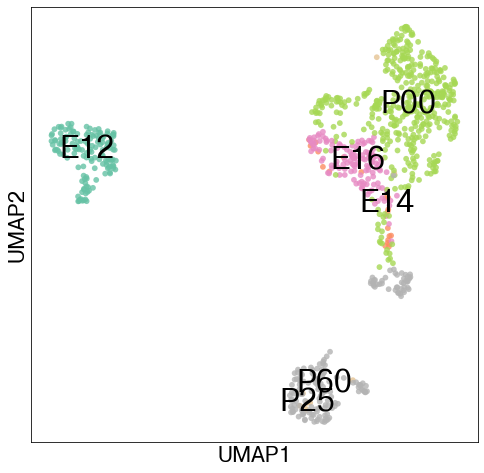

In [10]:
sc.pl.umap(adata, frameon = True, color = "time_point",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold",legend_loc='on data',palette = "Set2", save = "time_point_set2")

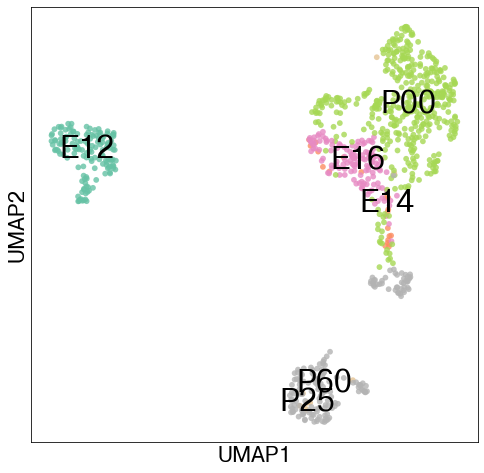

In [4]:
sc.pl.umap(adata, frameon = True, color = "time_point",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold",legend_loc='on data',palette = "Set2")

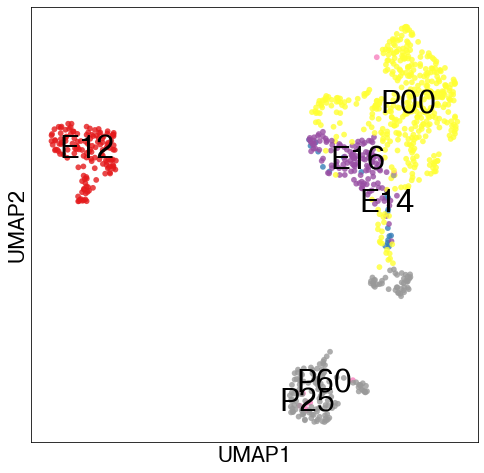

In [12]:
sc.pl.umap(adata, frameon = True, color = "time_point",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold",legend_loc='on data',palette = "Set1", save = "time_point_set1")

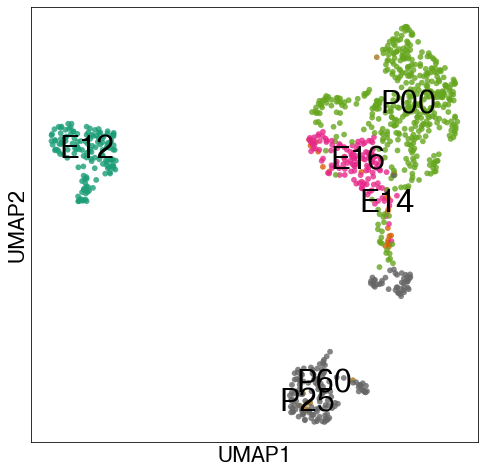

In [15]:
sc.pl.umap(adata, frameon = True, color = "time_point",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold",legend_loc='on data',palette = "Dark2", save = "time_point_dark2")

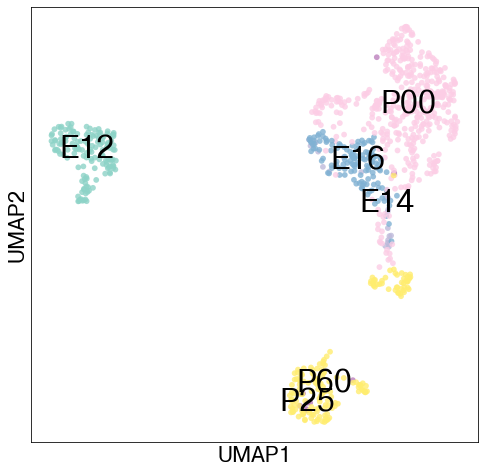

In [11]:
sc.pl.umap(adata, frameon = True, color = "time_point",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold",legend_loc='on data',palette = "Set3", save = "time_point_set2")

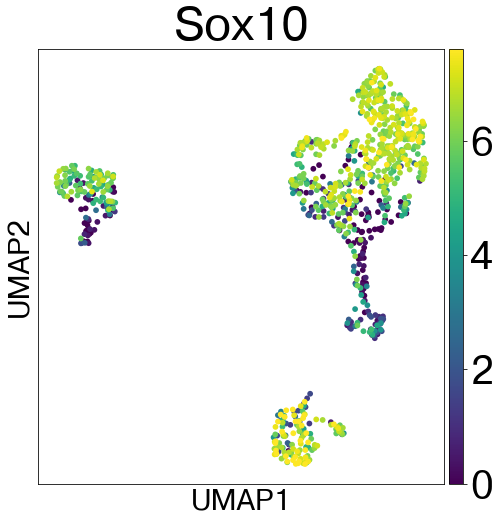

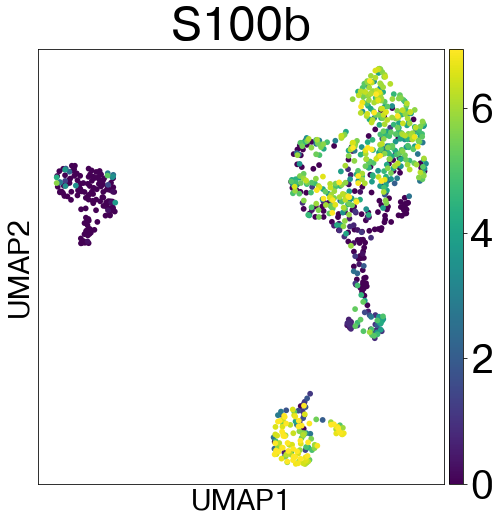

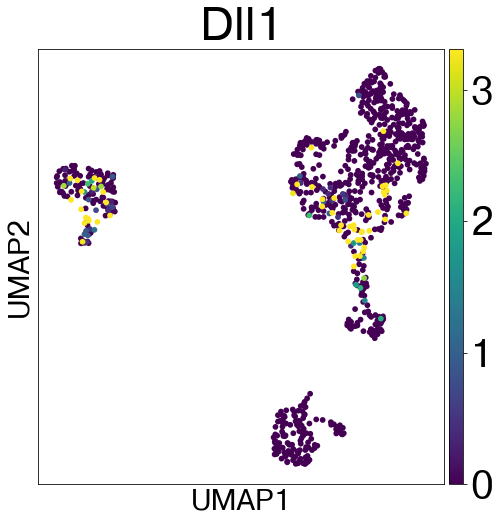

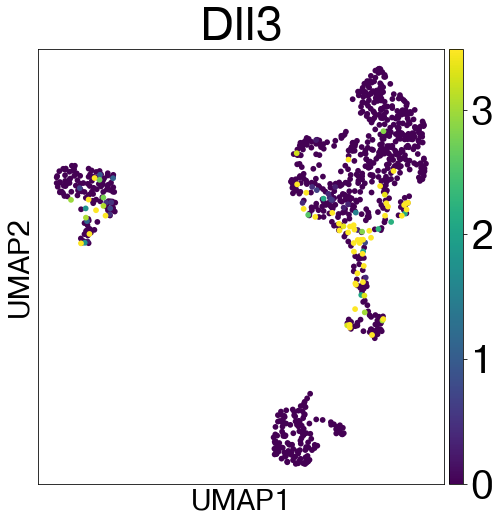

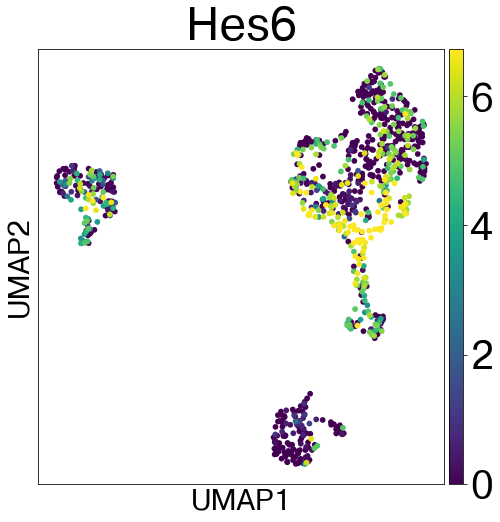

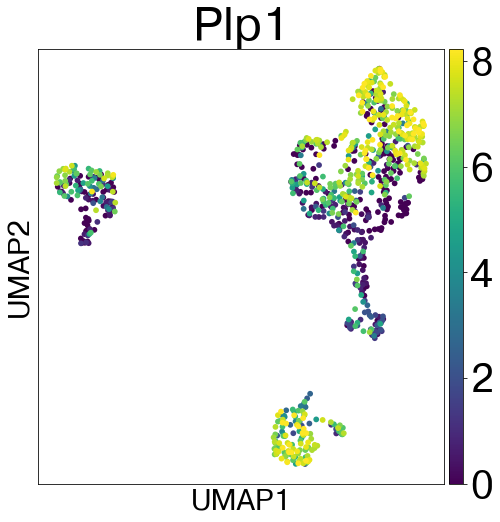

In [73]:
plt.rcParams['font.sans-serif'] = "Helvetica"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.size': 40})

for gene in ["Sox10","S100b","Dll1","Dll3","Hes6","Plp1"]:
    upper = np.percentile(adata.X[:,adata.var_names == gene],95)
    sc.pl.umap(adata, color = gene, vmax = upper,sort_order =True, save = gene + "_UMAP.png")

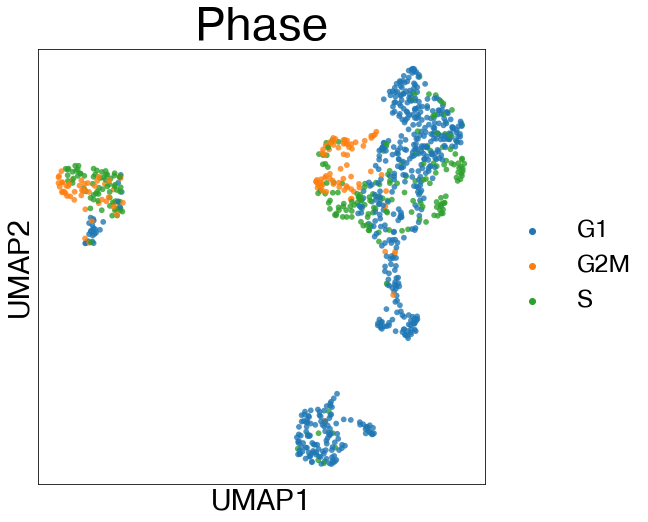

In [74]:
sc.pl.umap(adata, frameon = True, color = "phase",alpha = 0.8, title = "Phase",legend_fontweight = "bold",legend_fontsize = 25, save = "phase.png")

In [6]:
adata.obs["time_chase"] = ""
adata.obs["time_chase"][adata.obs["time_point"] == "E14"] = "tc"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


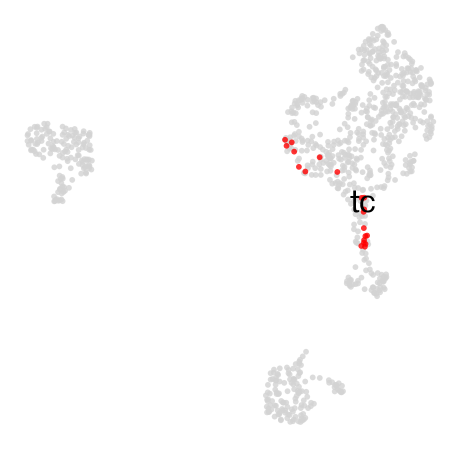

In [21]:
sc.pl.umap(adata[np.argsort(adata.obs["time_chase"]),:], frameon = False, color = "time_chase",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold",legend_loc='on data',palette = ["red"], groups = ["tc"],save = "time_chase")

Trying to set attribute `.obs` of view, making a copy.
... storing 'time_chase' as categorical


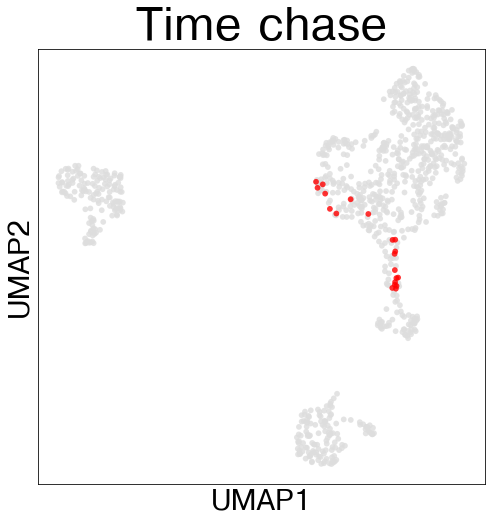

In [78]:
sc.pl.umap(adata[np.argsort(adata.obs["time_chase"]),:], frameon = True, color = "time_chase",alpha = 0.8, title = "Time chase",legend_fontweight = "bold",legend_fontsize = 25, save = "timechase.png",palette = ["#dddddd","red"], groups = ["tc",""], legend_loc = "")

Trying to set attribute `.obs` of view, making a copy.
... storing 'time_chase' as categorical


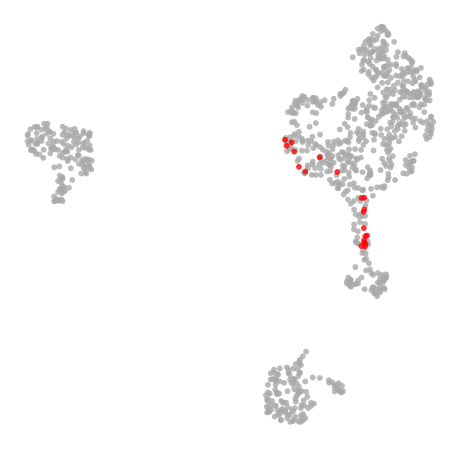

In [11]:
sc.pl.umap(adata[np.argsort(adata.obs["time_chase"]),:], frameon = False, color = "time_chase",alpha = 0.8, title = "",legend_fontweight = "bold",legend_fontsize = 25, save = "timechaseV2.png",palette = ["#a9a9a9","red"], groups = ["tc",""], legend_loc = "")

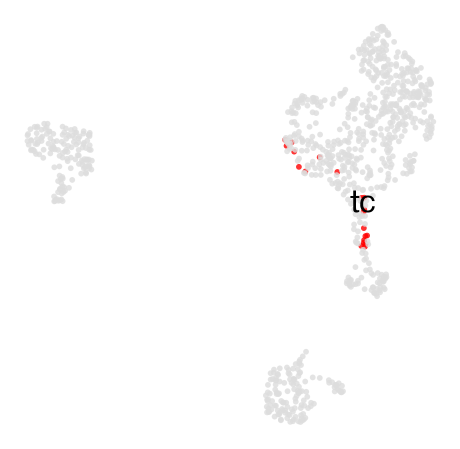

In [11]:
sc.pl.umap(adata[, frameon = False, color = "time_chase",legend_fontsize = 'x-large',alpha = 0.8, title = "",legend_fontweight = "bold",legend_loc='on data',palette = ["#dddddd","red"], groups = ["tc",""],save = "time_chase")

In [16]:
#save adata to file
adata.write("../../output/adata_anno_2.h5ad")

data_mat = adata.X.T

dat = pd.DataFrame(data_mat)
dat.index = adata.var_names
dat.columns = adata.obs_names

#dat.to_csv("../../output/adata_anno.csv")
adata.obs.to_csv("../../output/obs_anno_2.csv")
#adata.var.to_csv("../../output/var_anno.csv")


In [24]:
pd.DataFrame(adata.obsm["X_umap"]).to_csv("../../output/umap_coords.csv")

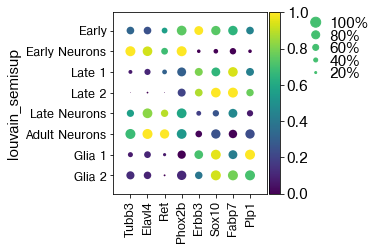

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[2.8, 0, 0.2, 0.5, 0.25])

In [24]:
plt.rcParams.update({'font.size': 15,'legend.fontsize':15})
markers = ["Tubb3","Elavl4","Ret","Phox2b","Erbb3","Sox10","Fabp7","Plp1"]
sc.pl.dotplot(adata, markers, groupby='louvain_semisup',color_map = "viridis",standard_scale = "var",save = "known_markers")   

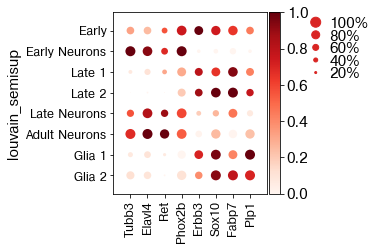

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[2.8, 0, 0.2, 0.5, 0.25])

In [25]:
plt.rcParams.update({'font.size': 15,'legend.fontsize':15})
markers = ["Tubb3","Elavl4","Ret","Phox2b","Erbb3","Sox10","Fabp7","Plp1"]
sc.pl.dotplot(adata, markers, groupby='louvain_semisup',standard_scale = "var",save = "known_markers")   

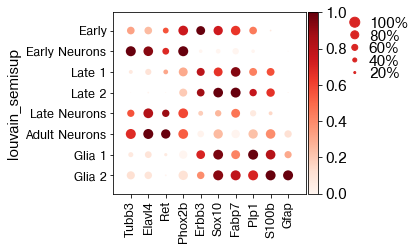

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[3.5, 0, 0.2, 0.5, 0.25])

In [11]:
plt.rcParams.update({'font.size': 15,'legend.fontsize':15})
markers = ["Tubb3","Elavl4","Ret","Phox2b","Erbb3","Sox10","Fabp7","Plp1","S100b","Gfap"]
sc.pl.dotplot(adata, markers, groupby='louvain_semisup',standard_scale = "var",save = "known_markers_v2")   

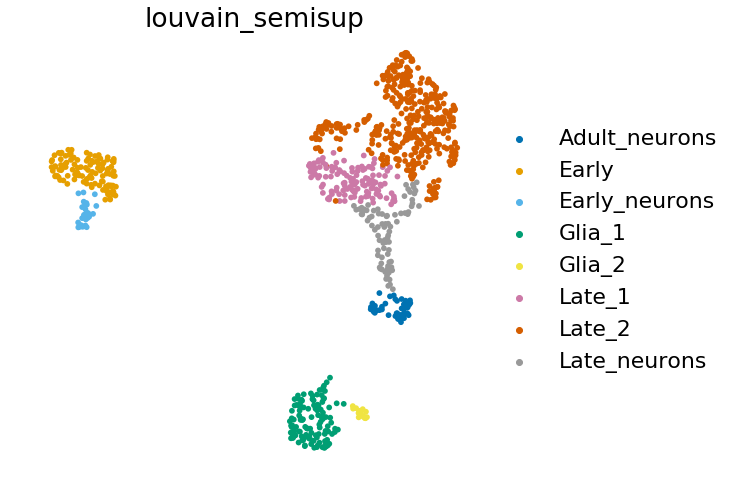

In [7]:
sc.pl.umap(adata, frameon = False, color = "louvain_semisup",palette = ["#0072B2", "#E69F00", "#56B4E9", "#009E73", 
                       "#F0E442", "#CC79A7", "#D55E00","#999999"])

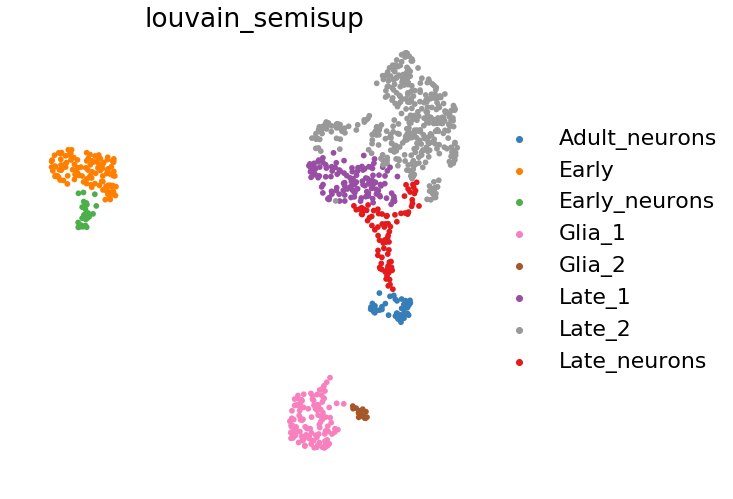

In [8]:
sc.pl.umap(adata, frameon = False, color = "louvain_semisup",palette = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])

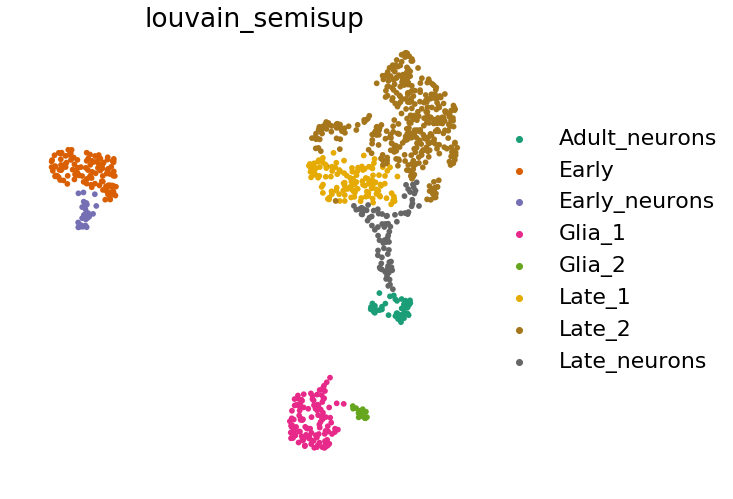

In [9]:
#palette = cm.get_cmap('Paired',8)
#print(palette)
sc.pl.umap(adata, frameon = False, color = "louvain_semisup",palette="Dark2")

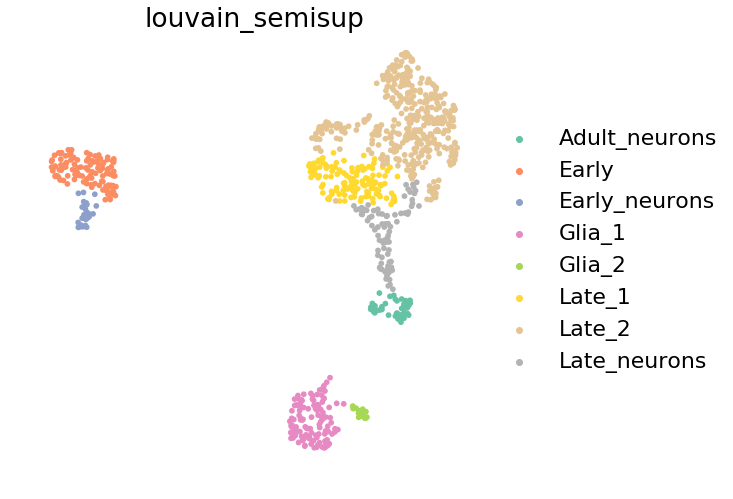

In [41]:
#palette = cm.get_cmap('Paired',8)
#print(palette)
sc.pl.umap(adata, frameon = False, color = "louvain_semisup",palette="Set2")

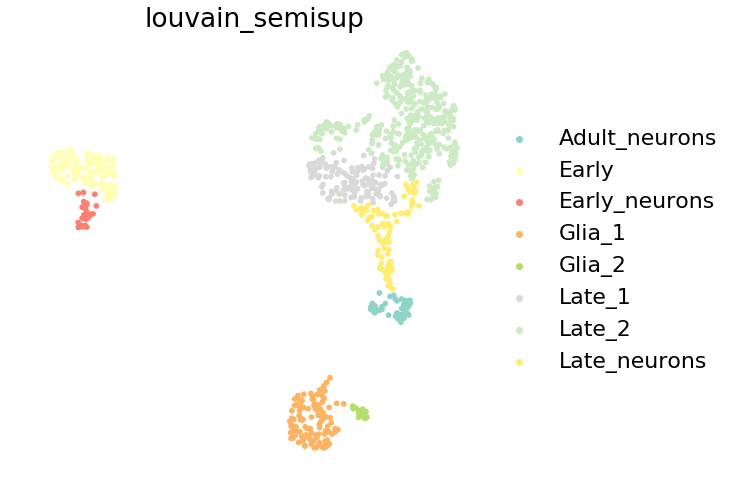

In [42]:
#palette = cm.get_cmap('Paired',8)
#print(palette)
sc.pl.umap(adata, frameon = False, color = "louvain_semisup",palette="Set3")

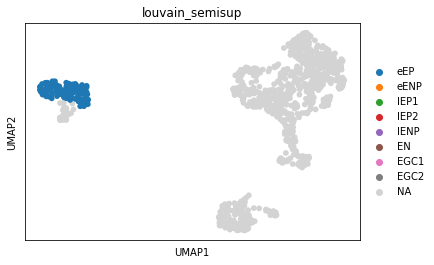

In [14]:
sc.pl.umap(adata, color = "louvain_semisup")

In [9]:
adata.obs['louvain_semisup'] = pd.Categorical(adata.obs['louvain_semisup'], 
                     categories=["eEP", "eENP", "lEP1", "lEP2", "lENP","EN","EGC1", "EGC2"],
                    ordered=True)
new_cluster_names = ["1", "2", "3", "4", "5","6","7", "8"]
adata.rename_categories('louvain_semisup', new_cluster_names)

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


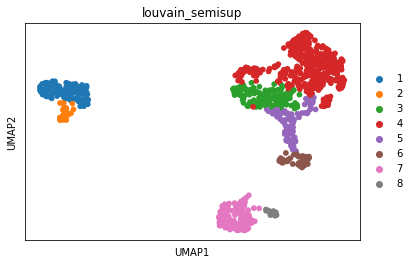

In [10]:
sc.pl.umap(adata, color = "louvain_semisup")

In [37]:
plt.rcParams.update({'font.size': 15,'legend.fontsize':15})
markers = ["Tubb3","Elavl4","Ret","Phox2b","Erbb3","Sox10","Fabp7","Plp1","S100b","Gfap"]
dp = sc.pl.dotplot(adata, markers, groupby='louvain_semisup',standard_scale = "var", return_fig=True)   

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

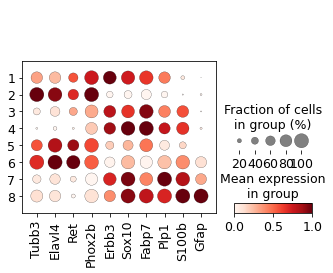

In [40]:
dp.get_axes()

In [41]:
dp.get_axes()['mainplot_ax']

<AxesSubplot:>

In [12]:
adata.obs.columns

Index(['batch', 'time_point', 'cell_num', 'batch_E12', 'batch_E16',
       'batch_P00', 'batch_P60', 'n_counts', 'log_counts', 'n_genes',
       'mt_frac', 'Cd14', 'Cdh1', 'Meis2', 'S_score', 'G2M_score', 'phase',
       'cc_dif', 'louvain_r1', 'louvain_r0.5', 'louvain_r0.8', 'louvain_r1.2',
       'louvain_r1.5', '__is_in_cluster__', 'louvain_semisup'],
      dtype='object')

In [13]:
for category in ['cell_num', 'Cd14', 'Cdh1', 'Meis2',  '__is_in_cluster__']:
    del adata.obs[category]

In [16]:
for category in ['batch_E12', 'batch_E16',
       'batch_P00', 'batch_P60']:
    del adata.obs[category]

In [34]:
adata.write("../../output/SmallIntestineDevelopmentalData.h5ad")

In [21]:
adata.layers

Layers with keys: counts, spliced, unspliced

In [22]:
adata.var

,accession,n_cells,n_counts,highly_variable,means,dispersions,dispersions_norm
index,,,,,,,
Xkr4,ENSMUSG00000051951,54,8848.0,False,1.955786,5.902690,0.264931
Sox17,ENSMUSG00000025902,3,3209.0,True,0.835954,6.604157,1.514397
Gm6085,ENSMUSG00000098104,460,23264.0,False,2.812197,4.220905,-1.999773
Gm6119,ENSMUSG00000102175,141,1153.0,False,0.557276,2.861187,-1.606720
Mrpl15,ENSMUSG00000033845,460,64344.0,False,3.944625,5.282955,-1.292846
...,...,...,...,...,...,...,...
Gm20929,ENSMUSG00000100045,4,12.0,False,0.018577,1.889328,-0.898983
Gm21497,ENSMUSG00000100726,3,12.0,False,0.015525,2.081655,-0.770769
Gm20916,ENSMUSG00000094746,8,12.0,False,0.015607,1.280314,-1.304980


In [32]:
#save data

data_mat = adata.layers["spliced"].toarray().T

dat = pd.DataFrame(data_mat)
dat.index = adata.var_names
dat.columns = adata.obs_names

dat.to_csv("../../output/SmallIntestineDevelopmentalDataSplicedCounts.csv")


data_mat = adata.layers["unspliced"].toarray().T

dat = pd.DataFrame(data_mat)
dat.index = adata.var_names
dat.columns = adata.obs_names

dat.to_csv("../../output/SmallIntestineDevelopmentalDataUnsplicedCounts.csv")


adata.obs.to_csv("../../output/SmallIntestineDevelopmentalDataCellMeta.csv")
adata.var.to_csv("../../output/SmallIntestineDevelopmentalDataGeneMeta.csv")

In [29]:
data_mat = adata.layers["spliced"].toarray().T

dat = pd.DataFrame(data_mat)